In [17]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('/home/users/cturrell/documents/eddy_feedback/')
import functions.data_wrangling as data 
import functions.eddy_feedback as ef 

# SPARC SRIP Data

- EPF_phi_pr (epfy) = [m3 s-2]
- EPFD_phi_pr (div1) = [m s-2]

In [18]:
srip = xr.open_mfdataset('/badc/srip/data/zonal/common_grid/jra_55/TEM_monthly*')
srip = srip.interp( latitude = np.arange(-90, 93, 3) )
srip

<xarray.Dataset>
Dimensions:         (time: 708, pressure: 22, latitude: 61)
Coordinates:
  * time            (time) datetime64[ns] 1958-01-14T09:00:00 ... 2016-12-14T...
  * pressure        (pressure) float32 1e+03 925.0 850.0 700.0 ... 3.0 2.0 1.0
  * latitude        (latitude) int64 -90 -87 -84 -81 -78 -75 ... 78 81 84 87 90
Data variables: (12/37)
    EPF_p_qg        (time, pressure, latitude) float32 dask.array<chunksize=(1, 22, 61), meta=np.ndarray>
    EPF_phi_qg      (time, pressure, latitude) float32 dask.array<chunksize=(1, 22, 61), meta=np.ndarray>
    EPFD_p_qg       (time, pressure, latitude) float32 dask.array<chunksize=(1, 22, 61), meta=np.ndarray>
    EPFD_phi_qg     (time, pressure, latitude) float32 dask.array<chunksize=(1, 22, 61), meta=np.ndarray>
    EPF_p_pr        (time, pressure, latitude) float32 dask.array<chunksize=(1, 22, 61), meta=np.ndarray>
    EPF_phi_pr      (time, pressure, latitude) float32 dask.array<chunksize=(1, 22, 61), meta=np.ndarray>
    ...              ...
    EPFD_p_qg_k3    (time, pressure, latitude) float32 dask.array<chunksize=(1, 22, 61), meta=np.ndarray>
    EPFD_phi_qg_k3  (time, pressure, latitude) float32 dask.array<chunksize=(1, 22, 61), meta=np.ndarray>
    EPF_p_pr_k3     (time, pressure, latitude) float32 dask.array<chunksize=(1, 22, 61), meta=np.ndarray>
    EPF_phi_pr_k3   (time, pressure, latitude) float32 dask.array<chunksize=(1, 22, 61), meta=np.ndarray>
    EPFD_p_pr_k3    (time, pressure, latitude) float32 dask.array<chunksize=(1, 22, 61), meta=np.ndarray>
    EPFD_phi_pr_k3  (time, pressure, latitude) float32 dask.array<chunksize=(1, 22, 61), meta=np.ndarray>
Attributes:
    Title:                     Transformed Eulerian Mean (TEM) diagnostics / ...
    Description:               EP flux and other terms from the TEM equations...
    Reanalysis:                jra_55
    Project_Homepage:          http://s-rip.ees.hokudai.ac.jp/
    SPARC_Homepage:            http://www.sparc-climate.org/
    Author:                    Patrick Martineau
    Report_issues_with_data:   patrick.martineau2@mail.mcgill.ca
    Creation_Date:             15-Oct-2017 09:41:14
    history:                   Sun Oct 15 09:41:14 2017: ncra /data/A/SRIP_da...
    nco_openmp_thread_number:  1

# Martin Jucker Calculations

- ep1 (epfy) = [m2 s-2]
- div1 (divFy) = [m/s/day]

In [19]:
jra = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/reanalysis_data/jra55_daily/jra55_ubar_div1.nc',
                       parallel=True, chunks={'time':31})
jra = jra.interp( lat = np.arange(-90, 93, 3) )
jra = jra.resample(time='MS').mean('time')
jra

<xarray.Dataset>
Dimensions:  (time: 708, level: 37, lat: 61)
Coordinates:
  * level    (level) float64 1.0 2.0 3.0 5.0 7.0 ... 925.0 950.0 975.0 1e+03
  * lat      (lat) int64 -90 -87 -84 -81 -78 -75 -72 ... 72 75 78 81 84 87 90
  * time     (time) datetime64[ns] 1958-01-01 1958-02-01 ... 2016-12-01
Data variables:
    ubar     (time, level, lat) float32 dask.array<chunksize=(1, 37, 61), meta=np.ndarray>
    div1     (time, level, lat) float64 dask.array<chunksize=(1, 37, 61), meta=np.ndarray>

# PAMIP Models

### CanESM5

epfy = [m3 s-2]

In [24]:
can_epfy = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/monthly/pdSST-pdSIC/epfy/CanESM5/*.nc', 
                         combine='nested', concat_dim='ens_ax', parallel=True)
can_epfy = can_epfy.sel(time=slice('2000-06', '2001-05'))
can_epfy

<xarray.Dataset>
Dimensions:    (time: 12, ens_ax: 300, bnds: 2, plev: 39, lat: 64)
Coordinates:
  * time       (time) object 2000-06-16 00:00:00 ... 2001-05-16 12:00:00
  * plev       (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 10.0 7.0 5.0 3.0
  * lat        (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86
Dimensions without coordinates: ens_ax, bnds
Data variables:
    time_bnds  (ens_ax, time, bnds) object dask.array<chunksize=(1, 1, 2), meta=np.ndarray>
    lat_bnds   (ens_ax, lat, bnds) float64 dask.array<chunksize=(1, 64, 2), meta=np.ndarray>
    epfy       (ens_ax, time, plev, lat) float32 dask.array<chunksize=(1, 1, 39, 64), meta=np.ndarray>
Attributes: (12/52)
    CCCma_model_hash:            37a65f96056a7aa4fa354897986cc70301801f67
    CCCma_parent_runid:          p2-amip-ru10
    CCCma_pycmor_hash:           8157ca33437ab096d583668ba0da0c2ce55acfe1
    CCCma_runid:                 pamip11-100
    Conventions:                 CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:   2000:04:01:00
    ...                          ...
    tracking_id:                 hdl:21.14100/f30700de-4b1e-47b8-b50a-82c5595...
    variable_id:                 epfy
    variant_label:               r100i1p2f1
    version:                     v20190429
    license:                     CMIP6 model data produced by The Government ...
    cmor_version:                3.4.0

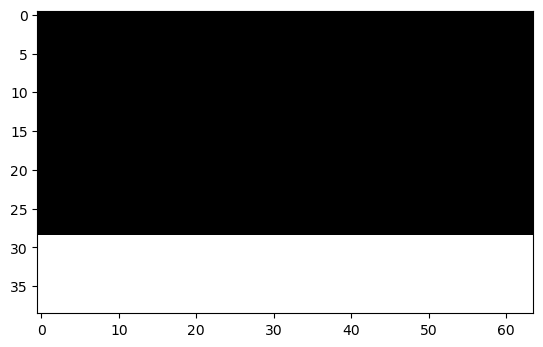

In [25]:
can_epfy = data.seasonal_dataset(can_epfy)
can_epfy = can_epfy.mean('time')

# Check missing values
is_nan_can = np.isnan(can_epfy.epfy)
is_nan_can = is_nan_can.mean('ens_ax')
plt.imshow(is_nan_can.values, cmap='gray')

### MIROC6

epfy = [m3 s-2]

In [26]:
miroc_epfy = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/monthly/pdSST-pdSIC/epfy/MIROC6/*.nc', 
                         combine='nested', concat_dim='ens_ax', parallel=True)
miroc_epfy

<xarray.Dataset>
Dimensions:    (time: 12, ens_ax: 100, bnds: 2, plev: 39, lat: 128)
Coordinates:
  * time       (time) datetime64[ns] 2000-06-16 ... 2001-05-16T12:00:00
  * plev       (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 10.0 7.0 5.0 3.0
  * lat        (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
Dimensions without coordinates: ens_ax, bnds
Data variables:
    time_bnds  (ens_ax, time, bnds) datetime64[ns] dask.array<chunksize=(1, 1, 2), meta=np.ndarray>
    lat_bnds   (ens_ax, lat, bnds) float64 dask.array<chunksize=(1, 128, 2), meta=np.ndarray>
    epfy       (ens_ax, time, plev, lat) float32 dask.array<chunksize=(1, 1, 39, 128), meta=np.ndarray>
Attributes: (12/43)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            PAMIP
    branch_method:          standard
    branch_time_in_child:   -91.0
    branch_time_in_parent:  4018.0
    creation_date:          2019-09-30T04:01:59Z
    ...                     ...
    title:                  MIROC6 output prepared for CMIP6
    variable_id:            epfy
    variant_label:          r100i1p1f1
    license:                CMIP6 model data produced by MIROC is licensed un...
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/349bd45f-b3cb-4fa0-92c7-985b26ffcf7b

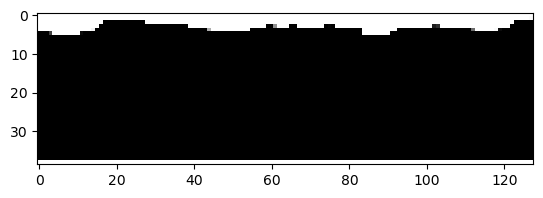

In [27]:
miroc_epfy = data.seasonal_dataset(miroc_epfy)
miroc_epfy = miroc_epfy.mean('time')

# Check missing values
is_nan_miroc = np.isnan(miroc_epfy.epfy)
is_nan_miroc = is_nan_miroc.mean('ens_ax')
plt.imshow(is_nan_miroc.values, cmap='gray')

### NorESM2-LM

In [28]:
nor_epfy = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/monthly/pdSST-pdSIC/epfy/NorESM2-LM/*.nc', 
                         combine='nested', concat_dim='ens_ax', parallel=True)
nor_epfy

<xarray.Dataset>
Dimensions:    (time: 12, ens_ax: 200, bnds: 2, plev: 39, lat: 96)
Coordinates:
  * time       (time) object 2000-06-16 00:00:00 ... 2001-05-16 12:00:00
  * plev       (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 10.0 7.0 5.0 3.0
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
Dimensions without coordinates: ens_ax, bnds
Data variables:
    time_bnds  (ens_ax, time, bnds) object dask.array<chunksize=(1, 1, 2), meta=np.ndarray>
    lat_bnds   (ens_ax, lat, bnds) float64 dask.array<chunksize=(1, 96, 2), meta=np.ndarray>
    epfy       (ens_ax, time, plev, lat) float32 dask.array<chunksize=(1, 1, 39, 96), meta=np.ndarray>
Attributes: (12/48)
    Conventions:               CF-1.7 CMIP-6.2
    activity_id:               PAMIP
    branch_method:             Hybrid-restart from year 2000-04-01 of amip
    branch_time:               0.0
    branch_time_in_child:      0.0
    branch_time_in_parent:     9215.0
    ...                        ...
    title:                     NorESM2-LM output prepared for CMIP6
    variable_id:               epfy
    variant_label:             r100i1p1f1
    license:                   CMIP6 model data produced by NCC is licensed u...
    cmor_version:              3.5.0
    tracking_id:               hdl:21.14100/43baa687-cf69-4640-b923-613139c0e245

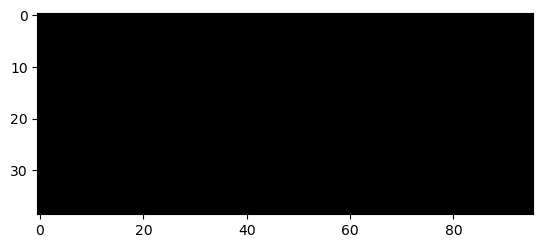

In [29]:
nor_epfy = data.seasonal_dataset(nor_epfy)
nor_epfy = nor_epfy.mean('time')

# Check missing values
is_nan_nor = np.isnan(nor_epfy.epfy)
is_nan_nor = is_nan_nor.mean('ens_ax')
plt.imshow(is_nan_nor.values, cmap='gray')